# Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Copy from the Drive

In [ ]:
from IPython.display import clear_output

In [ ]:
!cp /content/drive/MyDrive/ladi-vton.zip /content/ladi-vton.zip

In [ ]:
!unzip /content/ladi-vton.zip
clear_output()

# Installing

In [ ]:
%cd /content

!git clone https://github.com/IDEA-Research/Grounded-Segment-Anything

%cd /content/Grounded-Segment-Anything
!pip install -q -r requirements.txt
%cd /content/Grounded-Segment-Anything/GroundingDINO
!pip install -q .
%cd /content/Grounded-Segment-Anything/segment_anything
!pip install -q .
%cd /content/Grounded-Segment-Anything

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 opencv-python==4.7.0.72 diffusers==0.14.0 transformers==4.27.3 accelerate==0.18.0 clean-fid==0.1.35 torchmetrics[image]==0.11.4 wandb==0.14.0 matplotlib==3.7.1 tqdm xformers ftfy mediapipe

*This Result needs to be TRUE*

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
%cd /content/ladi-vton

/content/ladi-vton


# Clear and Upload

In [ ]:
%pwd

'/content/ladi-vton'

In [ ]:
%cd /content/ladi-vton

/content/ladi-vton


In [ ]:
#Clear
import os
import glob
import shutil
from PIL import Image

files = glob.glob('input/*/*/*.*')
for f in files:
  os.remove(f)

files = glob.glob('results/*/*/*.*')
for f in files:
  os.remove(f)

In [ ]:
#### add uploader for cloth and image

In [ ]:
# clear the data in the test_pairs file
with open("/content/ladi-vton/images/test_pairs.txt",'w') as file:
    pass

In [ ]:
### to fix google shell problems
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
### clear humans so that you can try your own uploaded cloth as well as the ones already there.
!rm -rf /content/ladi-vton/images/humans/*

!rm -rf /content/ladi-vton/images/upper_body/*

In [ ]:
import os
import shutil
from google.colab import files

#upload upper cloth

input_dir = '/content/ladi-vton/images/upper_body'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)

os.rename(input_path, input_dir+'/vvc_1111_1.jpg')


Saving green_tshirt_1.jpg to green_tshirt_1.jpg


### NOTE - We will need a cloth classifier to put clothes into respective directory.

FIXING IT FOR NOW

In [ ]:
# upload human on which you want to try

input_dir = '/content/ladi-vton/images/humans'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  print("input_path",input_path)
  print("filename", filename)
  shutil.move(filename, input_path)

os.rename(input_path, input_dir+'/vvh_1111_0.jpg')


Saving broken-white-slcolumbine-oversize-t-shirt.jpg to broken-white-slcolumbine-oversize-t-shirt.jpg
input_path /content/ladi-vton/images/humans/broken-white-slcolumbine-oversize-t-shirt.jpg
filename broken-white-slcolumbine-oversize-t-shirt.jpg


In [ ]:
#### clear and update the test_pairs.txt
import os

with open("./images/test_pairs.txt", "w") as a:
    for path, subdirs, files in os.walk(r'/content/ladi-vton/images/humans'):
      for filename in files:
        f = filename
    for clothpath, clothsubdirs, clothfiles in os.walk(r'/content/ladi-vton/images/upper_body'):
      for clothfilename in clothfiles:
        c = clothfilename

    a.write(str(f) + " "+ c+" 0")


# Preprocess

### NOTE - **ULD 012**

In [ ]:
#### proceed ahead

## Load Humans and Text pairs

In [ ]:
def resize_with_pad(im, target_width, target_height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    target_ratio = target_height / target_width
    im_ratio = im.height / im.width
    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = round(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = round(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (round((target_width - resize_width) / 2), round((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [ ]:
%pwd

'/content/ladi-vton'

### **NOTE** The problem with indexing was due to extra empty line in the `test_pairs.txt` file. Remove it and you are good to proceed.

In [ ]:
#Add pairs
def write_row(file_, *columns):
    print(*columns, sep='\t', end='\n', file=file_)

upper = open('/content/ladi-vton/input/upper_body/test_pairs_unpaired.txt', 'w')
lower = open('/content/ladi-vton/input/lower_body/test_pairs_unpaired.txt', 'w')
dresses = open('/content/ladi-vton/input/dresses/test_pairs_unpaired.txt', 'w')
all = open('/content/ladi-vton/input/test_pairs_paired.txt', 'w')

with open('images/test_pairs.txt', "r") as file:
    data = file.readlines()
    for line in data:
        word = line.split()
        # print(word)
        org_path = 'images/humans/' + word[0]
        if(word[2] == '0'):
          write_row(upper,'0'+word[0],word[1])
          write_row(all,'0'+word[0],word[1],word[2])
          res_path = 'input/upper_body/images/0' + word[0]
        elif(word[2] == '1'):
          write_row(lower,'1'+word[0],word[1])
          write_row(all,'1'+word[0],word[1],word[2])
          res_path = 'input/lower_body/images/1' + word[0]
        elif(word[2] == '2'):
          write_row(dresses,'2'+word[0],word[1])
          write_row(all,'2'+word[0],word[1],word[2])
          res_path = 'input/dresses/images/2' + word[0]
        image = Image.open(org_path)
        new = resize_with_pad(image,384,512)
        new.save(res_path)

upper.close()
lower.close()
dresses.close()
all.close()

<ipython-input-19-e04c8aed8ec9>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)


## Openpose

In [ ]:
%cd preprocess

/content/ladi-vton/preprocess


In [ ]:
!git clone https://github.com/Hzzone/pytorch-openpose.git
%cd pytorch-openpose

fatal: destination path 'pytorch-openpose' already exists and is not an empty directory.
/content/ladi-vton/preprocess/pytorch-openpose


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import copy
import numpy as np
import glob
import json
import os

from src import model
from src import util
from src.body import Body
from src.hand import Hand

body_estimation = Body('/content/ladi-vton/preprocess/pytorch-openpose/model/body_pose_model.pth')
for s in ['upper_body','lower_body','dresses']:
  input_path = '/content/ladi-vton/input/' + s + '/images/'
  output_path = '/content/ladi-vton/input/'+ s + '/skeletons/'
  keypoint_path = '/content/ladi-vton/input/'+ s + '/keypoints/'


  for images in glob.glob('*',root_dir = input_path):
      oriImg = cv2.imread(input_path+images)  # B,G,R order
      candidate, subset = body_estimation(oriImg)
      canvas = util.draw_bodypose(np.zeros_like(oriImg), candidate, subset)
      arr = candidate.tolist()
      vals = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
      for i in range(0,18):
        if len(arr)==i or arr[i][3] != vals[i]:
          arr.insert(i,[-1,-1,-1,vals[i]])

      keypoints = {'keypoints':arr[:18]}
      cv2.imwrite(output_path + images.replace('_0','_5'),canvas)
      with open(keypoint_path+ os.path.splitext(images)[0].replace('_0','_2') +".json" , 'w') as fin:
        fin.write(json.dumps(keypoints))

## Human Label Parse


In [ ]:
%pwd

'/content/ladi-vton/preprocess/pytorch-openpose'

In [ ]:
%cd ..

/content/ladi-vton/preprocess


In [ ]:
!pip install ninja

  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)


In [ ]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing

fatal: destination path 'Self-Correction-Human-Parsing' already exists and is not an empty directory.
/content/ladi-vton/preprocess/Self-Correction-Human-Parsing


In [ ]:
!python simple_extractor.py --dataset 'atr' --model-restore '/content/ladi-vton/preprocess/Self-Correction-Human-Parsing/checkpoints/final.pth' --input-dir '/content/ladi-vton/input/upper_body/images/' --output-dir '/content/ladi-vton/input/upper_body/label_maps/'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
100% 1/1 [00:00<00:00,  1.45it/s]


In [ ]:
!python simple_extractor.py --dataset 'atr' --model-restore '/content/ladi-vton/preprocess/Self-Correction-Human-Parsing/checkpoints/final.pth' --input-dir '/content/ladi-vton/input/lower_body/images/' --output-dir '/content/ladi-vton/input/lower_body/label_maps/'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
0it [00:00, ?it/s]


In [ ]:
!python simple_extractor.py --dataset 'atr' --model-restore '/content/ladi-vton/preprocess/Self-Correction-Human-Parsing/checkpoints/final.pth' --input-dir '/content/ladi-vton/input/dresses/images/' --output-dir '/content/ladi-vton/input/dresses/label_maps/'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
0it [00:00, ?it/s]


In [ ]:
%pwd

'/content/ladi-vton/preprocess/Self-Correction-Human-Parsing'

In [ ]:
%cd ..

/content/ladi-vton/preprocess


## DensePose


In [ ]:
# %cd preprocess

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'detectron2' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 399.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s e

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
%cd detectron2/projects/DensePose

/content/ladi-vton/preprocess/detectron2/projects/DensePose


In [ ]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 28.5 MB/s eta 0:00:00


In [ ]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/ladi-vton/input/upper_body/images dp_segm -v --output /content/ladi-vton/input/upper_body/dense/

[09/15 11:13:00 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[09/15 11:13:00 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
model_final_162be9.pkl: 256MB [00:02, 115MB/s]               
[09/15 11:13:03 apply_net]: Loading data from /content/ladi-vton/input/upper_body/images
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[09/15 11:13:07 apply_net]: Processing /content/ladi-vton/input/upper_body/images/0vvh_1111_0.jpg
[09/15 11:13:07 apply_net]: Output saved to /content/ladi-vton/input/upper_body/dense/0vvh_1111_5.png


In [ ]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/ladi-vton/input/lower_body/images dp_segm -v  --output /content/ladi-vton/input/lower_body/dense/

[09/15 11:13:14 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[09/15 11:13:14 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[09/15 11:13:16 apply_net]: Loading data from /content/ladi-vton/input/lower_body/images
WARNING [09/15 11:13:16 apply_net]: No input images for /content/ladi-vton/input/lower_body/images


In [ ]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/ladi-vton/input/dresses/images dp_segm -v   --output /content/ladi-vton/input/dresses/dense/

[09/15 11:13:18 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[09/15 11:13:18 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[09/15 11:13:20 apply_net]: Loading data from /content/ladi-vton/input/dresses/images
WARNING [09/15 11:13:20 apply_net]: No input images for /content/ladi-vton/input/dresses/images


In [ ]:
!python apply_net.py dump configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/ladi-vton/input/upper_body/images -v --output /content/ladi-vton/input/upper_body/dense/

[09/15 11:13:27 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[09/15 11:13:28 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[09/15 11:13:32 apply_net]: Loading data from /content/ladi-vton/input/upper_body/images
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[09/15 11:13:36 apply_net]: Processing /content/ladi-vton/input/upper_body/images/0vvh_1111_0.jpg
[09/15 11:13:36 apply_net]: Output saved to /content/ladi-vton/input/upper_body/dense/0vvh_1111_5_uv.npz


In [ ]:
!python apply_net.py dump configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/ladi-vton/input/lower_body/images -v --output /content/ladi-vton/input/lower_body/dense/

[09/15 11:13:41 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[09/15 11:13:41 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[09/15 11:13:43 apply_net]: Loading data from /content/ladi-vton/input/lower_body/images
WARNING [09/15 11:13:43 apply_net]: No input images for /content/ladi-vton/input/lower_body/images


In [ ]:
!python apply_net.py dump configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/ladi-vton/input/dresses/images -v --output /content/ladi-vton/input/dresses/dense/

[09/15 11:13:46 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[09/15 11:13:46 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[09/15 11:13:48 apply_net]: Loading data from /content/ladi-vton/input/dresses/images
WARNING [09/15 11:13:48 apply_net]: No input images for /content/ladi-vton/input/dresses/images


In [ ]:
%pwd

'/content/ladi-vton/preprocess/detectron2/projects/DensePose'

In [ ]:
%cd ../../../..

/content/ladi-vton


### the masks that we have got are colored and to get the greyscale we have to normalize.

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import glob
pattern = 'input/*/dense/*'
mp ={0: 0, 128: 18, 64: 4, 132: 19, 69: 5, 136: 20, 75: 6, 140: 21, 145: 22, 85: 9, 150: 23, 90: 10, 155: 24, 121: 16, 105: 13, 111: 14, 52: 2, 117: 15, 57: 3, 124: 17,
     2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 9, 10: 10, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24}

lut = np.zeros((256, 1), dtype=np.uint8)

for i in range(0,256):
    lut[i] = mp.get(i) or mp[min(mp.keys(), key = lambda key: abs(key-i))]

for images in glob.glob(pattern):
    if images.endswith(".png"):
      image = cv2.imread(images,cv2.IMREAD_GRAYSCALE)
      cv2.imwrite(images,cv2.LUT(image,lut))

## Load Cloth

In [ ]:
#Clear
import os
import glob
import shutil
from PIL import Image

files = glob.glob('input/*/*/*.*')
for f in files:
  if f.endswith("_1.jpg") or f.endswith("_1.png"):
    os.remove(f)

In [ ]:
def resize_with_pad(im, target_width, target_height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    target_ratio = target_height / target_width
    im_ratio = im.height / im.width
    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = round(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = round(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (round((target_width - resize_width) / 2), round((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

### here it looks for the images with _1 in the last so make sure you name your files accordingly in the beginning.

In [ ]:
for c in ['dresses','upper_body','lower_body']:
  files = glob.glob('images/'+c+'/*.*')
  path = 'input/' + c + '/images/'
  for f in files:
    if f.endswith("_1.jpg"):
      res = path +os.path.basename(f)
      shutil.copy (f, res)
      image = Image.open(res)
      new = resize_with_pad(image,384,512)
      new.save(res)

<ipython-input-50-e04c8aed8ec9>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)


## Cloth Mask

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import copy
import glob
import json
import os

def otsu(img , n  , x ):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(img_gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,n,x)
    return thresh

def contour(img):
    edges = cv2.dilate(cv2.Canny(img,200,255),None)
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)
    masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
    return masked

def get_cloth_mask(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
    return mask

def write_edge(C_path,E_path):
    img = cv2.imread(C_path)
    res = get_cloth_mask(img)
    ###change the value of 120 in case your masks are not good with white color
    if(np.mean(res)<100):
        ot = otsu(img,11,0.6)
        res = contour(ot)
    cv2.imwrite(E_path,res)

for s in ['upper_body','lower_body','dresses']:
  input_path = '/content/ladi-vton/input/' + s + '/images/'
  output_path = '/content/ladi-vton/input/'+ s + '/masks/'
  for images in glob.glob('*',root_dir = input_path):
      if images.endswith("_1.jpg"):
        write_edge(input_path + images , output_path+ os.path.splitext(images)[0] +".png")

# Testing

In [ ]:
%cd /content/ladi-vton/

/content/ladi-vton


In [ ]:
# !sh test.sh

!python src/inference.py --dataset dresscode --dresscode_dataroot ./input  --output_dir ./results --test_order unpaired  --batch_size 1 --num_workers 2 --enable_xformers_memory_efficient_attention

2023-09-15 11:13:56.758435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at laion/CLIP-ViT-H-14-laion2B-s32B-b79K were not used when initializing CLIPVisionModelWithProjection: ['text_model.encoder.layers.7.layer_norm1.weight', 'text_model.encoder.layers.8.mlp.fc2.bias', 'text_model.encoder.layers.3.mlp.fc2.weight', 'text_model.encoder.layers.6.self_attn.q_proj.weight', 'text_model.encoder.layers.15.layer_norm2.bias', 'text_model.encoder.layers.14.mlp.fc2.weight', 'text_model.encoder.layers.9.self_attn.v_proj.weight', 'text_model.encoder.layers.22.mlp.fc2.bias', 'text_model.encoder.layers.1.mlp.fc2.weight', 'text_model.encoder.layers.4.mlp.fc1.weight', 'text_model.encoder.layers.9.self_attn.out_proj.bias', 'text_model.encoder.layers.22.layer_norm1.bias', 'text_model.encoder.layers.19.layer_norm2.weight', 'text_model.encoder.layers.23.mlp.fc1.weight', 'text_model.encoder.layers.7.mlp.fc2.weight', 'te

In [ ]:
import gc
gc.collect()

42

#Results DressCode

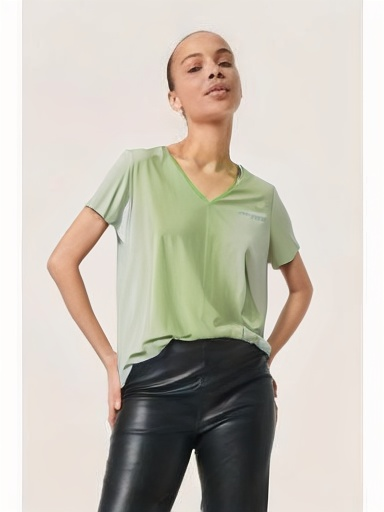

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import glob

pattern = 'results/unpaired/*/*'
for images in glob.glob(pattern):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
      cv2_imshow(cv2.imread(images, cv2.IMREAD_UNCHANGED))

### Add refinement

In [ ]:
%pwd

'/content/ladi-vton'

In [ ]:
import cv2
import os
import glob
import mediapipe
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# ITER

In [ ]:
dresscode = 'final'

# Generator

In [ ]:
filepath = os.path.join('input', f"test_pairs_paired.txt")
with open(filepath, 'r') as f:
    lines = f.read().splitlines()
org_paths = sorted(
      [os.path.join('input', category, 'images', line.strip().split()[0]) for line in lines for
        category in ['lower_body', 'upper_body', 'dresses'] if
        os.path.exists(os.path.join('input', category, 'images', line.strip().split()[0]))])
res_paths = sorted(
                [os.path.join('results/unpaired', category, name) for category in ['lower_body', 'upper_body', 'dresses'] for
                 name in os.listdir(os.path.join('results/unpaired', category)) if
                 os.path.exists(os.path.join('results/unpaired', category, name))])

In [ ]:
assert len(org_paths) == len(res_paths)
sz = len(org_paths)

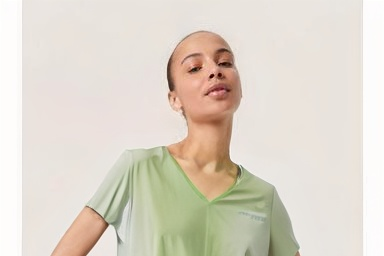

In [ ]:
for iter in range(0,sz):
  org_img = cv2.imread(org_paths[iter])
  org_res = cv2.imread(res_paths[iter])
  h,w = int(org_img.shape[0]/2),org_img.shape[1]
  img = org_img[:h,:w]
  res = org_res[:h,:w]
  # cv2_imshow(res)
  mp_face_mesh = mediapipe.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
  results = face_mesh.process(img[:,:,::-1])
  if(results.multi_face_landmarks == None):
     print('miss')
     continue
  landmarks = results.multi_face_landmarks[0]
  df = pd.DataFrame(list(mp_face_mesh.FACEMESH_FACE_OVAL),columns=['p1','p2'])
  routes_idx = []

  p2 = df.iloc[0]['p1']
  p2 = df.iloc[0]['p2']
  for i in range(0,df.shape[0]):
    obj = df[df['p1'] == p2]
    p1 = obj['p1'].values[0]
    p2 = obj['p2'].values[0]

    cur = []
    cur.append(p1)
    cur.append(p2)
    routes_idx.append(cur)

  routes = []
  for sid,tid in routes_idx:
    sxy = landmarks.landmark[sid]
    txy = landmarks.landmark[tid]

    source = (int(sxy.x * img.shape[1]) , int(sxy.y * img.shape[0]))
    target = (int(txy.x * img.shape[1]) , int(txy.y * img.shape[0]))

    routes.append(source)
    routes.append(target)

  mask = np.zeros((img.shape[0],img.shape[1]))
  mask = cv2.fillConvexPoly(mask,np.array(routes),1)
  mask = mask.astype(bool)
  res[mask] = img[mask]
  cv2_imshow(res)
  org_img[:h,:w] = img
  org_res[:h,:w] = res
  cv2.imwrite(res_paths[iter].replace('results/unpaired','final').replace('_0.jpg','_'+dresscode+'.jpg'),org_res)

In [ ]:
pattern = 'final/lower_body/*'
for images in glob.glob(pattern):
    if images.endswith( dresscode + ".jpg"):
      cv2_imshow(cv2.imread(images, cv2.IMREAD_UNCHANGED))

In [ ]:
import gc
gc.collect()

53

### GroundingDINO and SAM

In [ ]:
%cd /content/Grounded-Segment-Anything

/content/Grounded-Segment-Anything


In [ ]:
import os, sys

sys.path.append(os.path.join(os.getcwd(), "GroundingDINO"))

import argparse
import copy

from IPython.display import display
from PIL import Image, ImageDraw, ImageFont
from torchvision.ops import box_convert

# Grounding DINO
import GroundingDINO.groundingdino.datasets.transforms as T
from GroundingDINO.groundingdino.models import build_model
from GroundingDINO.groundingdino.util import box_ops
from GroundingDINO.groundingdino.util.slconfig import SLConfig
from GroundingDINO.groundingdino.util.utils import clean_state_dict, get_phrases_from_posmap
from GroundingDINO.groundingdino.util.inference import annotate, load_image, predict

import supervision as sv

# segment anything
from segment_anything import build_sam, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt


# diffusers
import PIL
import requests
import torch
from io import BytesIO
from diffusers import StableDiffusionInpaintPipeline


from huggingface_hub import hf_hub_download

## Load models

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

### Grounding DINO model

In [ ]:
def load_model_hf(repo_id, filename, ckpt_config_filename, device=device):
    cache_config_file = hf_hub_download(repo_id=repo_id, filename=ckpt_config_filename)

    args = SLConfig.fromfile(cache_config_file)
    args.device = device
    model = build_model(args)

    cache_file = hf_hub_download(repo_id=repo_id, filename=filename)
    checkpoint = torch.load(cache_file, map_location=device)
    log = model.load_state_dict(clean_state_dict(checkpoint['model']), strict=False)
    print("Model loaded from {} \n => {}".format(cache_file, log))
    _ = model.eval()
    return model

In [ ]:
ckpt_repo_id = "ShilongLiu/GroundingDINO"
ckpt_filenmae = "groundingdino_swinb_cogcoor.pth"
ckpt_config_filename = "GroundingDINO_SwinB.cfg.py"


groundingdino_model = load_model_hf(ckpt_repo_id, ckpt_filenmae, ckpt_config_filename, device)

### SAM

In [ ]:
! wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth



In [ ]:
sam_checkpoint = 'sam_vit_h_4b8939.pth'

sam_predictor = SamPredictor(build_sam(checkpoint=sam_checkpoint).to(device))

### Stable Diffusion (Inpainting)

In [ ]:
sd_pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
).to(device)


In [ ]:
sd_pipe.enable_attention_slicing()
sd_pipe.enable_xformers_memory_efficient_attention()

## Inference

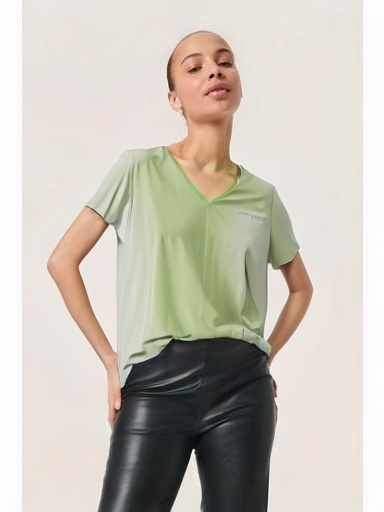

In [ ]:

local_image_path = "/content/ladi-vton/final/upper_body/0vvh_1111_final.jpg"
image_source, image = load_image(local_image_path)
Image.fromarray(image_source)

## Grounding DINO for detection

In [ ]:
# detect object using grounding DINO
def detect(image, text_prompt, model, box_threshold = 0.3, text_threshold = 0.25):
  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=text_prompt,
      box_threshold=box_threshold,
      text_threshold=text_threshold
  )

  annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
  annotated_frame = annotated_frame[...,::-1] # BGR to RGB
  return annotated_frame, boxes

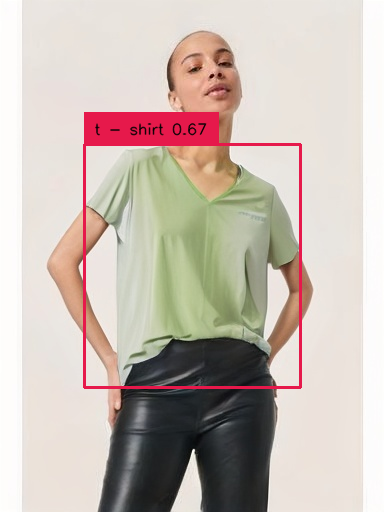

In [ ]:
annotated_frame, detected_boxes = detect(image, text_prompt="t-shirt", model=groundingdino_model)
Image.fromarray(annotated_frame)

## SAM for segmentation

In [ ]:
def segment(image, sam_model, boxes):
  sam_model.set_image(image)
  H, W, _ = image.shape
  boxes_xyxy = box_ops.box_cxcywh_to_xyxy(boxes) * torch.Tensor([W, H, W, H])

  transformed_boxes = sam_model.transform.apply_boxes_torch(boxes_xyxy.to(device), image.shape[:2])
  masks, _, _ = sam_model.predict_torch(
      point_coords = None,
      point_labels = None,
      boxes = transformed_boxes,
      multimask_output = False,
      )
  return masks.cpu()


def draw_mask(mask, image, random_color=True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.8])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

    annotated_frame_pil = Image.fromarray(image).convert("RGBA")
    mask_image_pil = Image.fromarray((mask_image.cpu().numpy() * 255).astype(np.uint8)).convert("RGBA")

    return np.array(Image.alpha_composite(annotated_frame_pil, mask_image_pil))

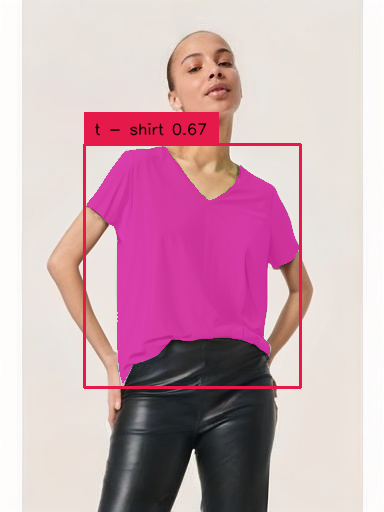

In [ ]:
segmented_frame_masks = segment(image_source, sam_predictor, boxes=detected_boxes)

#change the index in case you are getting multiple masks
# annotated_frame_with_mask = draw_mask(segmented_frame_masks[1][0], annotated_frame)
annotated_frame_with_mask = draw_mask(segmented_frame_masks[0][0], annotated_frame)
Image.fromarray(annotated_frame_with_mask)

## Stable Diffusion for inpainting

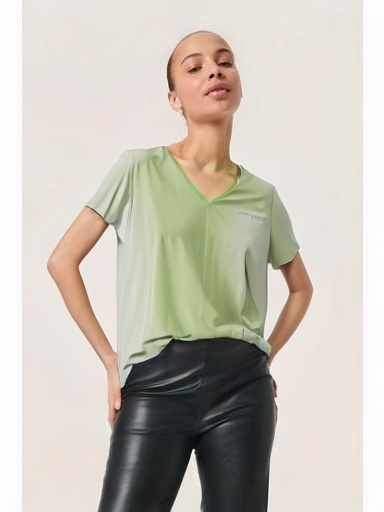

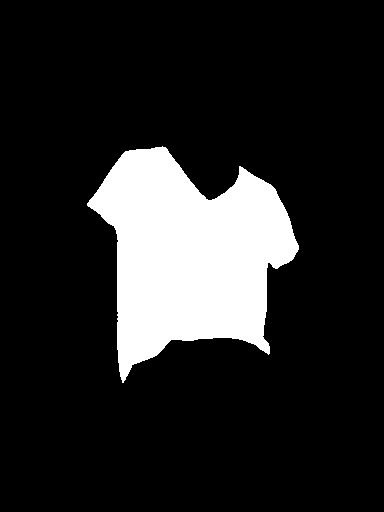

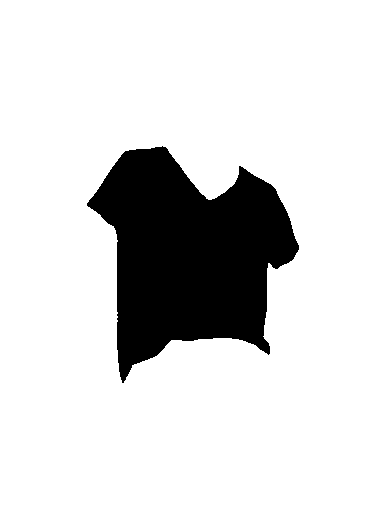

In [ ]:
# create mask images

#also change segmented frame masks here as well
# mask = segmented_frame_masks[1][0].cpu().numpy()
mask = segmented_frame_masks[0][0].cpu().numpy()
inverted_mask = ((1 - mask) * 255).astype(np.uint8)


image_source_pil = Image.fromarray(image_source)
image_mask_pil = Image.fromarray(mask)
inverted_image_mask_pil = Image.fromarray(inverted_mask)


display(*[image_source_pil, image_mask_pil, inverted_image_mask_pil])

In [ ]:
def generate_image(image, mask, prompt, negative_prompt, pipe, seed):
  # resize for inpainting
  w, h = image.size
  in_image = image.resize((512, 512))
  in_mask = mask.resize((512, 512))

  generator = torch.Generator(device).manual_seed(seed)

  result = pipe(image=in_image, mask_image=in_mask, prompt=prompt,
                negative_prompt=negative_prompt,
                num_inference_steps = 60, generator=generator)
  result = result.images[0]

  return result.resize((w, h))

  0%|          | 0/60 [00:00<?, ?it/s]

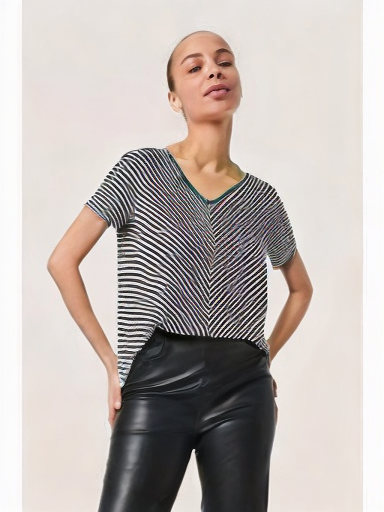

In [ ]:
prompt = "a striped t-shirt"
# prompt += "highly detailed, hyper realistic, best quality, realistic, 8k."

negative_prompt="worse quality,bad anatomy, bad hair, bad hands, extra fingers, bad fingers,bad lips,  low res, bad details, blurry, semi-realistic, bad face, bad anatomy, extra limbs, disfigured, bad prompt, anime, cartoon"
seed = -1 # for reproducibility

generated_image = generate_image(image=image_source_pil, mask=image_mask_pil,
                                 prompt=prompt,
                                 negative_prompt = negative_prompt,
                                 pipe=sd_pipe,

                                 seed=seed)
torch.cuda.empty_cache()
gc.collect()
generated_image

In [ ]:
gc.collect()

74